The following is an exploratory data analysis of real-world data from start-up companies which have received investment, either privately alone, or also with public offerings. We will explore the kinds of sectors these companies work in, and analysis the best/worst sectors for a start-up.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sys

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)

In [2]:
df = pd.read_csv("investments2.csv", encoding = "ISO-8859-1", engine='python')
df.head()
# we have information on name, url, category, market, acquired/operating/closed status, geographical location, and investments.

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df['status'].value_counts()
# most of our start-ups are still operating. We will try to see which markets have the most start-ups which have been acquired, 
# vs the markets where the most start-ups have closed.

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [138]:
df = df.drop(['name','homepage_url'], axis = 1)
# name and url can be dropped, they tell us nothing.

df.iloc[4].isnull().sum() # checks how many NA values in an observation

0

In [139]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: str(x).replace(',',''))
# Funding has been encoded with commas - here we remove them.

Let's take a look at the kinds of markets that these start-ups are operating in, as well as the Operating/Acquired/Closed in these markets.

In [140]:
dfa = df[df['status'] == 'acquired']     # subset 'acquired'
dfo = df[df['status'] == 'operating']    # subset 'operating'
dfc = df[df['status'] == 'closed']       # subset 'closed'

do = pd.DataFrame(data = dfo['market'].value_counts())  # dataframe of 'operating', value count of markets
do.columns = ['Operating']

da = pd.DataFrame(data = dfa['market'].value_counts())  # dataframe of 'acquired', value count of markets
da.columns = ['Acquired']

dc = pd.DataFrame(data = dfc['market'].value_counts())  # dataframe of 'closed', value count of markets
dc.columns = ['Closed']

dm = pd.DataFrame(data = df['market'].value_counts())  # dataframe of total markets
dm.columns = ['Total']

ds = pd.concat([do,da,dc,dm], axis = 1)

ds.head(15)

,Operating,Acquired,Closed,Total
Software,3809.0,464.0,254.0,4620
Biotechnology,3266.0,183.0,139.0,3688
Mobile,1602.0,198.0,144.0,1983
E-Commerce,1551.0,99.0,89.0,1805
Curated Web,1171.0,206.0,253.0,1655
Health Care,1067.0,67.0,51.0,1207
Clean Technology,1026.0,55.0,83.0,1200
Enterprise Software,1007.0,200.0,49.0,1280
Games,934.0,107.0,120.0,1182
Hardware + Software,928.0,75.0,62.0,1081


Let's restrict ourselves to markets where we have at least 60 start-ups.

In [36]:
ds_short = ds[ds['Total'] > 60]

ds_short.head(15)

,Operating,Acquired,Closed,Total
Software,3809.0,464.0,254.0,4620
Biotechnology,3266.0,183.0,139.0,3688
Mobile,1602.0,198.0,144.0,1983
E-Commerce,1551.0,99.0,89.0,1805
Curated Web,1171.0,206.0,253.0,1655
Health Care,1067.0,67.0,51.0,1207
Clean Technology,1026.0,55.0,83.0,1200
Enterprise Software,1007.0,200.0,49.0,1280
Games,934.0,107.0,120.0,1182
Hardware + Software,928.0,75.0,62.0,1081


In [14]:
len(ds_short)

90

We are left with 90 markets, each of which has at least 60 instances of a start-up. This is workable.

To be certain about our numbers, we'll do some calculations to see if we're missing a lot of data.

In [37]:
oac_sum = pd.DataFrame(data = ds_short.drop(['Total'], axis = 1).sum(axis = 1))  # drop Total
oac_sum.columns = ['Added']  # add columns across

together = pd.concat([ds_short, oac_sum], axis = 1)

together['Missing'] = together['Total'] - together['Added']  # how many missing?
together['Missing_Perc'] = round(together['Missing'] / together['Total'],2)  # to get percentage

together.head(15)

,Operating,Acquired,Closed,Total,Added,Missing,Missing_Perc
Software,3809.0,464.0,254.0,4620,4527.0,93.0,0.02
Biotechnology,3266.0,183.0,139.0,3688,3588.0,100.0,0.03
Mobile,1602.0,198.0,144.0,1983,1944.0,39.0,0.02
E-Commerce,1551.0,99.0,89.0,1805,1739.0,66.0,0.04
Curated Web,1171.0,206.0,253.0,1655,1630.0,25.0,0.02
Health Care,1067.0,67.0,51.0,1207,1185.0,22.0,0.02
Clean Technology,1026.0,55.0,83.0,1200,1164.0,36.0,0.03
Enterprise Software,1007.0,200.0,49.0,1280,1256.0,24.0,0.02
Games,934.0,107.0,120.0,1182,1161.0,21.0,0.02
Hardware + Software,928.0,75.0,62.0,1081,1065.0,16.0,0.01


We see that for most markets, we are missing only a small percentage of data. This shouldn't cause us any problems.

Next, let's have a look at Operating/Acquired/Closed by percentage.

In [38]:
# new columns of percentages

together['Operating_Perc'] = round(together['Operating'] / together['Added'],2) 
together['Acquired_Perc'] = round(together['Acquired'] / together['Added'],2)
together['Closed_Perc'] = round(together['Closed'] / together['Added'],2)

Below is a list of the top 20 markets with the highest percentage of start-ups still operating.

In [119]:
together['Operating_Perc'].sort_values(ascending = False).head(20)

Market
Internet of Things     0.99
Transportation         0.97
Finance Technology     0.97
Real Estate            0.96
Digital Media          0.96
Medical                0.95
Manufacturing          0.95
Local Businesses       0.95
Retail                 0.94
Health and Wellness    0.94
Pharmaceuticals        0.94
Restaurants            0.94
Financial Services     0.94
Hospitality            0.94
Crowdsourcing          0.94
Fashion                0.94
Big Data               0.94
Entertainment          0.94
Education              0.94
Technology             0.94
Name: Operating_Perc, dtype: float64

We can look at this graphically.

In [120]:
market_plot_data = together[['Operating_Perc', 'Acquired_Perc', 'Closed_Perc']]  # percentages per market
market_plot_data.reset_index(inplace = True)  # set market to be categorical column, in order to plot

# check NA values
market_plot_data.sort_values('Operating_Perc', ascending = False).isna().sum()
# have 6 markets where the Percentage of closed companies is NA.

Market            0
Operating_Perc    0
Acquired_Perc     0
Closed_Perc       6
dtype: int64

In [121]:
market_plot_data[market_plot_data['Closed_Perc'].isna()]
# all of these can be set to 0

,Market,Operating_Perc,Acquired_Perc,Closed_Perc
43,Big Data,0.94,0.06,NaN
53,Digital Media,0.96,0.04,NaN
62,Pharmaceuticals,0.94,0.06,NaN
63,Internet of Things,0.99,0.01,NaN
70,Restaurants,0.94,0.06,NaN
73,Finance Technology,0.97,0.03,NaN


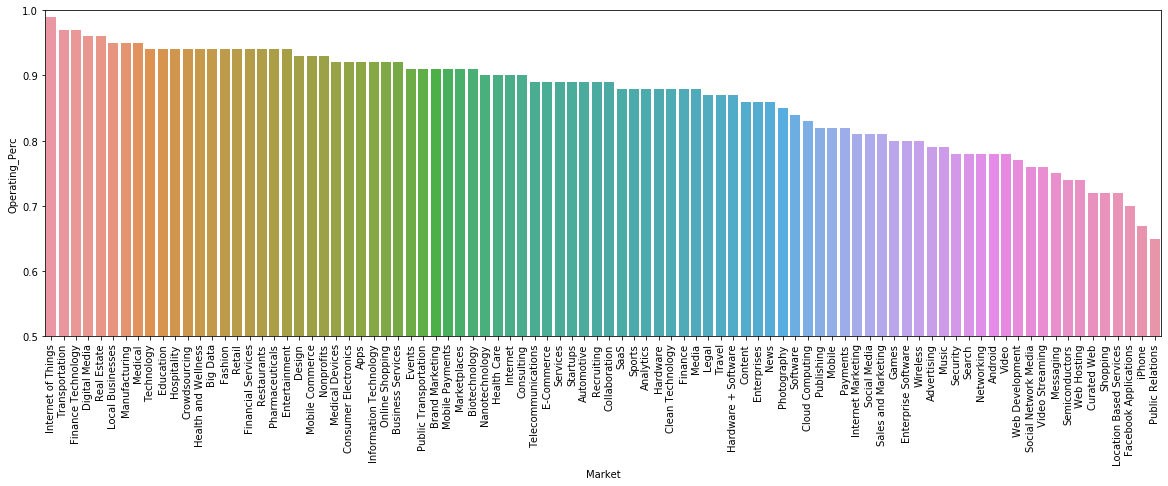

In [124]:
market_plot_data = market_plot_data.fillna(0)
market_operating = market_plot_data.sort_values('Operating_Perc', ascending = False)

plt.figure(figsize = (20,6))
plt.xticks(rotation='vertical')
plt.ylim(0.5,1)

sns.barplot(x = 'Market', y = 'Operating_Perc', data = market_operating)

Above is a plot of the number of companies in a particular market which are still operating. The y axis shows from 50% to 100%, as no market has an overall company-closure rate of less than 50%.

Below is a list of the top 20 markets with the highest percentage of start-ups which have been acquired, and a plot with the markets with the most company acquisitions.

In [125]:
together['Acquired_Perc'].sort_values(ascending = False).head(20)

Market
Web Hosting                0.19
Wireless                   0.19
Semiconductors             0.18
Video Streaming            0.17
Security                   0.17
iPhone                     0.17
Shopping                   0.16
Enterprise Software        0.16
Public Relations           0.14
Payments                   0.14
Video                      0.14
Curated Web                0.13
Publishing                 0.13
Messaging                  0.13
Facebook Applications      0.13
Advertising                0.13
Sales and Marketing        0.12
Cloud Computing            0.12
Location Based Services    0.12
Search                     0.12
Name: Acquired_Perc, dtype: float64

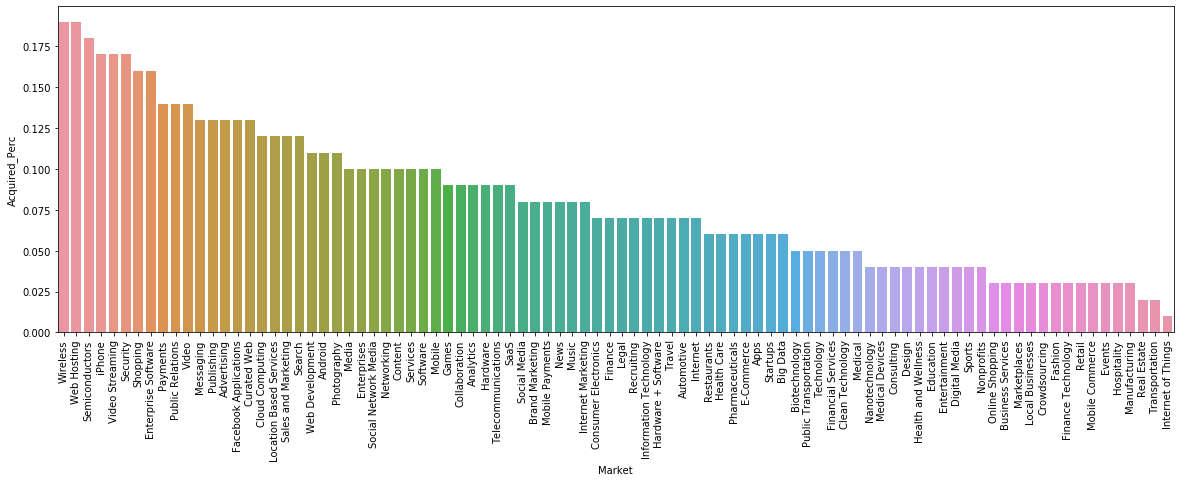

In [127]:
market_operating = market_plot_data.sort_values('Acquired_Perc', ascending = False)

plt.figure(figsize = (20,6))
plt.xticks(rotation='vertical')

sns.barplot(x = 'Market', y = 'Acquired_Perc', data = market_operating)

And finally, below is a list of the top 20 markets with the highest percentage of start-ups which have closed, as well as a plot of markets by number of company closures.

In [23]:
together['Closed_Perc'].sort_values(ascending = False).head(20)

Public Relations           0.20
Location Based Services    0.17
Facebook Applications      0.17
Curated Web                0.16
iPhone                     0.16
Social Network Media       0.14
Web Development            0.13
Music                      0.12
Messaging                  0.12
Networking                 0.12
Shopping                   0.12
Social Media               0.11
Internet Marketing         0.11
Android                    0.11
Games                      0.10
Search                     0.10
Video                      0.09
Advertising                0.08
Sales and Marketing        0.08
Sports                     0.08
Name: Closed_Perc, dtype: float64

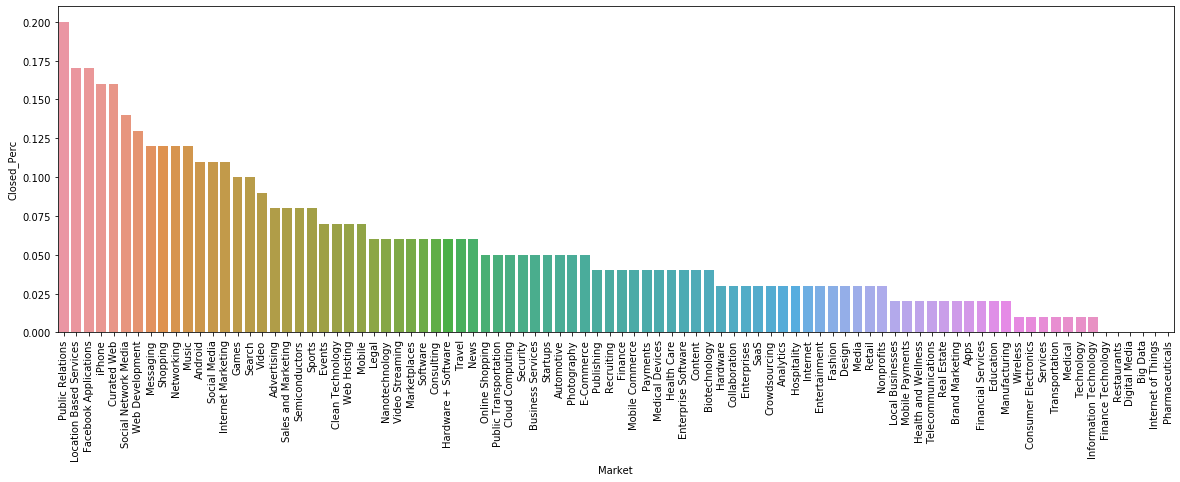

In [128]:
market_operating = market_plot_data.sort_values('Closed_Perc', ascending = False)

plt.figure(figsize = (20,6))
plt.xticks(rotation='vertical')

sns.barplot(x = 'Market', y = 'Closed_Perc', data = market_operating)

So we can see that, from a start-up point of view, there are certain sectors in which it is better to start your business in, both in terms of maintaining business and in being acquired, and similarly, there are certain sectors in which the chances of the business closing down are significantly higher than in others.

Next, we subset the initial dataset to get the start-ups which operate in the above markets only. 

In [141]:
ds_filter = df['market'].isin(['Software', 'Biotechnology', 'Mobile', 'E-Commerce', 'Curated Web',
       'Health Care', 'Clean Technology', 'Enterprise Software', 'Games',
       'Hardware + Software', 'Health and Wellness', 'Advertising',
       'Education', 'Finance', 'Social Media', 'Manufacturing', 'Analytics',
       'Consulting', 'Hospitality', 'Security', 'Real Estate', 'Fashion',
       'Semiconductors', 'Web Hosting', 'News', 'Travel', 'Medical',
       'Technology', 'SaaS', 'Music', 'Apps', 'Sports', 'Search', 'Messaging',
       'Internet', 'Entertainment', 'Photography', 'Marketplaces', 'Video',
       'Automotive', 'Transportation', 'Networking', 'Design', 'Big Data',
       'Social Network Media', 'Startups', 'Nonprofits', 'Public Relations',
       'Cloud Computing', 'Medical Devices', 'Retail', 'Financial Services',
       'Digital Media', 'Media', 'Consumer Electronics', 'Sales and Marketing',
       'Public Transportation', 'Nanotechnology', 'Enterprises',
       'Information Technology', 'Web Development', 'Legal', 'Pharmaceuticals',
       'Services', 'Internet of Things', 'Android', 'Events',
       'Mobile Commerce', 'Payments', 'Collaboration', 'Recruiting',
       'Restaurants', 'Content', 'Crowdsourcing', 'Local Businesses',
       'Finance Technology', 'Brand Marketing', 'Wireless',
       'Telecommunications', 'Business Services', 'Internet Marketing',
       'Mobile Payments', 'Hardware', 'Publishing', 'Online Shopping',
       'Facebook Applications', 'Video Streaming', 'Shopping', 'iPhone',
       'Location Based Services'])

# this filters the dataset

dfmarket = df[ds_filter]

dfmarket.head()

,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1.0,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,|Advertising|,Advertising,4912393,closed,ARG,NaN,Buenos Aires,Buenos Aires,1.0,NaN,NaN,NaN,NaN,2007-01-16,2007-01-16,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can drop category_list, as we already have the information that we need in market. 

In [142]:
dfmarket = dfmarket.drop(['category_list'], axis = 1)

There are a lot of null values for the various geographic colums. We're not analysing based on geography here, so we can drop those columns. We will do the same for date columns based on when the start-up was founded. An interesting further analysis would be whether the success rates of different markets changed over the years.

In [143]:
dfmarket.isnull().sum().head(12)

market                   0
funding_total_usd        0
status                 808
country_code          3301
state_code           13966
region                3301
city                  3944
funding_rounds           0
founded_at            7940
founded_month         7992
founded_quarter       7992
founded_year          7992
dtype: int64

In [144]:
dfmarket = dfmarket.drop(['country_code', 'region', 'city', 'state_code', 'founded_at', 
                          'first_funding_at', 'last_funding_at', 'founded_month', 'founded_quarter', 'founded_year'], axis = 1)

dfmarket.head()

,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,1750000,acquired,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Games,4000000,operating,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,40000,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Software,7000000,NaN,1.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Advertising,4912393,closed,1.0,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's explore what types of companies might be more likely to get IPO funding. We'll add a column summing up all IPO round funding, and a second binary column IPO, 1 if the company has had an IPO, 0 if not.

In [145]:
def total_ipo(input):
    input['total_ipo'] = input['round_A'] + input['round_B'] + input['round_C'] + input['round_D'] + input['round_E'] + input['round_G'] + input['round_H'] 
    
total_ipo(dfmarket)


dfmarket['ipo'] = np.where(dfmarket['total_ipo']>0.0, 1, 0)

In [146]:
dfmarket.head()

,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_ipo,ipo
0,News,1750000,acquired,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Games,4000000,operating,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Publishing,40000,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,Software,7000000,NaN,1.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,1
6,Advertising,4912393,closed,1.0,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Now we look at the number of start-ups which have had IPOs, per market.

In [161]:
n_companies = pd.DataFrame(dfmarket['market'].value_counts())  # DF of markets 

n_ipos = pd.DataFrame(dfmarket[['market','ipo']].groupby('market').sum())  # DF of market and IPOs, with total IPOs per market

ipos_per_market = pd.concat([n_companies, n_ipos], axis = 1)

ipos_per_market['ipo_rate'] = round(ipos_per_market['ipo'] / ipos_per_market['market'], 2) # IPO by percentage overall

ipos_per_market.sort_values(by = ['ipo_rate'], ascending = False).head(20) # markets with highest percentage of IPO

,market,ipo,ipo_rate
Semiconductors,507,281,0.55
Enterprise Software,1280,549,0.43
Security,526,219,0.42
Wireless,76,31,0.41
Collaboration,72,29,0.40
Nanotechnology,96,38,0.40
Video Streaming,63,24,0.38
Web Hosting,446,171,0.38
Enterprises,98,36,0.37
Health Care,1207,436,0.36


Here we have some interesting results - that the companies we might have expected to have the highest probability of an IPO (e.g. Software, Big Data) don't have relatively high percentages of IPO funding. Some caveats here - some markets have relatively few instances of start-ups, e.g. 'Wireless' with 76 companies, whereas others have many more, e.g. 'Biotechnology' with 3688. 

We could have also factored in founding year here, as well as other types of funding. Finally, we will plot, as we did above.

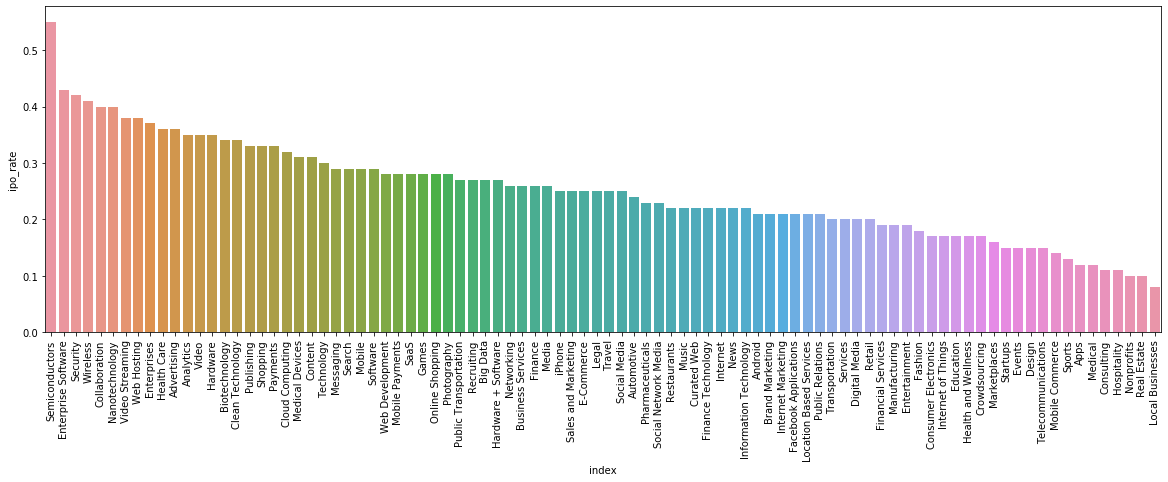

In [160]:
ipos_per_market.reset_index(inplace = True) # set markets as categorical variable column

ipo_rates = ipos_per_market.sort_values('ipo_rate', ascending = False)

plt.figure(figsize = (20,6))
plt.xticks(rotation='vertical')


sns.barplot(x = 'index', y = 'ipo_rate', data = ipo_rates)